In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train-1.csv')

/Users/muronghe/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
holiday_events = pd.read_csv('holidays_events.csv')
items = pd.read_csv('items.csv')
oil = pd.read_csv('oil.csv')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
test = pd.read_csv('test-1.csv')

In [8]:
holiday_events['locale_name'].value_counts() 

Ecuador                           174
Quito                              13
Ambato                             12
Guaranda                           12
Latacunga                          12
Riobamba                           12
Guayaquil                          11
Cuenca                              7
Ibarra                              7
Puyo                                6
Esmeraldas                          6
Salinas                             6
Loja                                6
Cayambe                             6
Imbabura                            6
Cotopaxi                            6
Santo Domingo                       6
Quevedo                             6
Manta                               6
Machala                             6
El Carmen                           6
Santa Elena                         6
Santo Domingo de los Tsachilas      6
Libertad                            6
Name: locale_name, dtype: int64

In [12]:
holiday_events['type'].value_counts() 

Holiday       221
Event          56
Additional     51
Transfer       12
Work Day        5
Bridge          5
Name: type, dtype: int64

In [13]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [25]:
len(stores['state'].unique())

16

In [19]:
stores.groupby(['state'])['state'].count()

state
Azuay                              3
Bolivar                            1
Chimborazo                         1
Cotopaxi                           2
El Oro                             2
Esmeraldas                         1
Guayas                            11
Imbabura                           1
Loja                               1
Los Rios                           2
Manabi                             3
Pastaza                            1
Pichincha                         19
Santa Elena                        1
Santo Domingo de los Tsachilas     3
Tungurahua                         2
Name: state, dtype: int64

In [26]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [20]:
stores['state'].value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Manabi                             3
Azuay                              3
Cotopaxi                           2
Los Rios                           2
El Oro                             2
Tungurahua                         2
Imbabura                           1
Esmeraldas                         1
Chimborazo                         1
Santa Elena                        1
Bolivar                            1
Pastaza                            1
Loja                               1
Name: state, dtype: int64

Datasets: 
1) holiday events 
2) items
3) oil
4) stores 
5) transactions

train, test, sample submission

## Questions 
### 1) How would holiday events affect unit sales? Depends on the holiday. Certain items will sell well on certain holidays. What do people in Eucador typically eat on a holiday? 
### 2) 


## Findings 
Training dataset is from 1/1/2013 - 8/15/2017 

Test dataset is from 8/16/2017 - 8/31/20017 

In [6]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [7]:
print(train.date.min())
print(train.date.max())

NameError: name 'train' is not defined

In [46]:
print(test.date.min())
print(test.date.max())

2017-08-16
2017-08-31


In [4]:
stores = pd.read_csv('stores.csv')

In [57]:
stores[stores['store_nbr']==25]
# Store Types
stores.groupby(['type'])['type'].count()

type
A     9
B     8
C    15
D    18
E     4
Name: type, dtype: int64

In [81]:
items.groupby(['family'])['family'].count()

family
AUTOMOTIVE                      20
BABY CARE                        1
BEAUTY                          19
BEVERAGES                      613
BOOKS                            1
BREAD/BAKERY                   134
CELEBRATION                     31
CLEANING                       446
DAIRY                          242
DELI                            91
EGGS                            41
FROZEN FOODS                    55
GROCERY I                     1334
GROCERY II                      14
HARDWARE                         4
HOME AND KITCHEN I              77
HOME AND KITCHEN II             45
HOME APPLIANCES                  1
HOME CARE                      108
LADIESWEAR                      21
LAWN AND GARDEN                 26
LINGERIE                        20
LIQUOR,WINE,BEER                73
MAGAZINES                        6
MEATS                           84
PERSONAL CARE                  153
PET SUPPLIES                    14
PLAYERS AND ELECTRONICS         17
POULTRY      

In [83]:
items.groupby(['family'])['family'].count()

family
AUTOMOTIVE                      20
BABY CARE                        1
BEAUTY                          19
BEVERAGES                      613
BOOKS                            1
BREAD/BAKERY                   134
CELEBRATION                     31
CLEANING                       446
DAIRY                          242
DELI                            91
EGGS                            41
FROZEN FOODS                    55
GROCERY I                     1334
GROCERY II                      14
HARDWARE                         4
HOME AND KITCHEN I              77
HOME AND KITCHEN II             45
HOME APPLIANCES                  1
HOME CARE                      108
LADIESWEAR                      21
LAWN AND GARDEN                 26
LINGERIE                        20
LIQUOR,WINE,BEER                73
MAGAZINES                        6
MEATS                           84
PERSONAL CARE                  153
PET SUPPLIES                    14
PLAYERS AND ELECTRONICS         17
POULTRY      

In [79]:
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(subplots = True, x = items['family'])
plt.show()

TypeError: bar() missing 2 required positional arguments: 'left' and 'height'

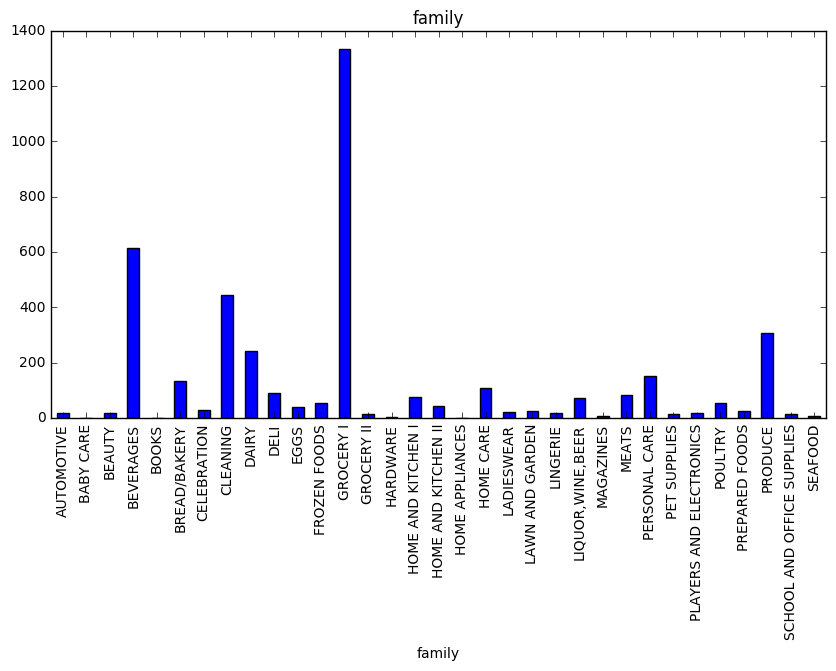

In [92]:
k = items.groupby(['family'])['family'].count()
k.plot.bar(
    subplots = True, x = items['family'], figsize = (10,5), legend = None)
plt.show()

In [52]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [21]:
train.shape

(125497040, 6)

In [22]:
oil = pd.read_csv('oil.csv')

In [23]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [25]:
transaction = pd.read_csv('transactions.csv')

In [26]:
transaction.shape

(83488, 3)

In [27]:
transaction.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [5]:
items = pd.read_csv('items.csv')

In [30]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [32]:
holiday = pd.read_csv('holidays_events.csv')

In [33]:
holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [34]:
sample = pd.read_csv('sample_submission-1.csv')

In [35]:
sample.head()

,id,unit_sales
0,125497040,0
1,125497041,0
2,125497042,0
3,125497043,0
4,125497044,0


In [36]:
test = pd.read_csv('test-1.csv')

In [37]:
test.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False
